# **Sportswear Retailer Sales Analysis Project**


---



# Content

1. Introduction
2. Exploratory Data Analysis (EDA)
3. Data Analysis
4. Time Series Analysis
5. Data Correlation





---



# Introduction

This is a sales data analysis portfolio project of Adidas US Sales datset. The dataset used for the analysis is downloaded from kaggle website(kaggle.com). In this project, I will try to do basic data analysis to figure out the strengths and weakness in the sales operation. Also, I will provide this analysis with visualizations to make clear of results.

Data is in tabular format(.csv file) of 13 columns and 9648 records. Those columns are:
Retailer, Retailer ID, InvoiceDate, Region, State, City, Product, Price per Unit, Units Sold, Total Sales, Operating Profit, Operating Margin Percentage, Sales Method.


## Getting Started

In the beginning, let's import some libraries which I will be using in the Analysis, then pull the dataset file(.csv file) "adidas_us_sales.csv" into python and store it in a dataframe named "df" using pandas library.

In [227]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta


In [228]:
# plotting theme
plt.style.use('dark_background')
color_palette = sns.color_palette()
%matplotlib inline


In [229]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [230]:
# store data into pandas dataframe
df = pd.read_csv('/content/adidas_us_sales.csv')


***

## Exploratory Data Analysis (EDA)

In [231]:
df.head()


,Retailer,Retailer ID,InvoiceDate,Region,State,City,Product,Price per Unit,Units Sold,TotalSales,Operating Profit,Operating Margin Percentage,Sales Method
0,Foot Locker,1185732,1-Jan-20,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2-Jan-20,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,3-Jan-20,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,4-Jan-20,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,5-Jan-20,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [232]:
df.columns


Index(['Retailer', 'Retailer ID', 'InvoiceDate', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'TotalSales',
       'Operating Profit', 'Operating Margin Percentage', 'Sales Method'],
      dtype='object')

In [233]:
df = df.rename(columns = {
    'Retailer ID': 'RetailerID',
    'Price per Unit': 'UnitPrice',
    'Units Sold': 'UnitsSold',
    'Operating Profit': 'OperatingProfit',
    'Operating Margin Percentage': 'OperatingMarginPercentage',
    'Sales Method': 'SalesMethod'
    })


In [234]:
df.shape


(9648, 13)

In [235]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Retailer                   9648 non-null   object 
 1   RetailerID                 9648 non-null   int64  
 2   InvoiceDate                9648 non-null   object 
 3   Region                     9648 non-null   object 
 4   State                      9648 non-null   object 
 5   City                       9648 non-null   object 
 6   Product                    9648 non-null   object 
 7   UnitPrice                  9648 non-null   float64
 8   UnitsSold                  9648 non-null   int64  
 9   TotalSales                 9648 non-null   float64
 10  OperatingProfit            9648 non-null   float64
 11  OperatingMarginPercentage  9648 non-null   float64
 12  SalesMethod                9648 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage:

<br>
As shown in the above cell, we have 6 columns with numerical data and their data types are
defined perfectly, and 6 columns with text data their types are defined perfectly.
however, There is one column that represent dates, so it will be converted from object to date in data preperation step.

In [236]:
# count nulls per column
df.isnull().sum()


,0
Retailer,0
RetailerID,0
InvoiceDate,0
Region,0
State,0
City,0
Product,0
UnitPrice,0
UnitsSold,0
TotalSales,0


In [237]:
# checking duplicates
print(df.shape)
df = df.drop_duplicates()
print(df.shape)


(9648, 13)
(9648, 13)


Let's explore columns.

## Retailer and RetailerID Columns

In [238]:
# Retailer
df['Retailer'].unique()       # 6 Retailers


array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [239]:
# RetailerID
df['RetailerID'].unique()    # 4 RetailerIDs


array([1185732, 1197831, 1128299, 1189833])

We have 6 Retailers, but only 4 RetailerIDs. let's find how!

In [240]:
# RetailerID and Retailer columns
df[['RetailerID', 'Retailer']].value_counts().sort_index()


RetailerID  Retailer     
1128299     Foot Locker       515
            Kohl's            216
            Sports Direct     281
            Walmart           194
            West Gear        1164
1185732     Amazon            949
            Foot Locker      2018
            Kohl's            288
            Sports Direct     962
            Walmart           132
            West Gear         916
1189833     Kohl's            360
1197831     Foot Locker       104
            Kohl's            166
            Sports Direct     789
            Walmart           300
            West Gear         294
Name: count, dtype: int64

In [241]:
# Retailer and RetailerID columns
df[['Retailer', 'RetailerID']].value_counts().sort_index()


Retailer       RetailerID
Amazon         1185732        949
Foot Locker    1128299        515
               1185732       2018
               1197831        104
Kohl's         1128299        216
               1185732        288
               1189833        360
               1197831        166
Sports Direct  1128299        281
               1185732        962
               1197831        789
Walmart        1128299        194
               1185732        132
               1197831        300
West Gear      1128299       1164
               1185732        916
               1197831        294
Name: count, dtype: int64

So we have RetailerID that represents multiplie Retailers and vice verse. As a result, we cannot use RetailerID Column to represent distinct Retailers while doing the analysis.

## Region Column

In [242]:
df['Region'].value_counts()


,count
Region,
West,2448
Northeast,2376
Midwest,1872
South,1728
Southeast,1224


## State Column

In [243]:
df['State'].value_counts()


,count
State,
California,432
Texas,432
New York,360
Florida,360
Mississippi,216
Oregon,216
Louisiana,216
Idaho,216
New Mexico,216


## City Column

In [244]:
df['City'].value_counts()


,count
City,
Portland,360
Charleston,288
Orlando,216
Salt Lake City,216
Houston,216
Boise,216
Phoenix,216
Albuquerque,216
Atlanta,216


## Product Column

In [245]:
df['Product'].value_counts()


,count
Product,
Men's Street Footwear,1610
Men's Athletic Footwear,1610
Women's Street Footwear,1608
Women's Apparel,1608
Women's Athletic Footwear,1606
Men's Apparel,1606


***

## InvoiceDate Column

In [246]:
df['InvoiceDate'].dtype


dtype('O')

In [247]:
df['InvoiceDate'].unique()


array(['1-Jan-20', '2-Jan-20', '3-Jan-20', '4-Jan-20', '5-Jan-20',
       '6-Jan-20', '7-Jan-20', '8-Jan-20', '21-Jan-20', '22-Jan-20',
       '23-Jan-20', '24-Jan-20', '25-Jan-20', '26-Jan-20', '27-Jan-20',
       '28-Jan-20', '29-Jan-20', '30-Jan-20', '31-Jan-20', '1-Feb-20',
       '2-Feb-20', '3-Feb-20', '4-Feb-20', '5-Feb-20', '6-Feb-20',
       '7-Feb-20', '8-Feb-20', '9-Feb-20', '10-Feb-20', '3-Mar-20',
       '4-Mar-20', '5-Mar-20', '6-Mar-20', '7-Mar-20', '8-Mar-20',
       '9-Mar-20', '10-Mar-20', '11-Mar-20', '12-Mar-20', '13-Mar-20',
       '14-Mar-20', '15-Mar-20', '16-Mar-20', '17-Mar-20', '18-Mar-20',
       '31-Mar-20', '17-Apr-20', '18-Apr-20', '19-Apr-20', '20-Apr-20',
       '21-Apr-20', '22-Apr-20', '23-Apr-20', '24-Apr-20', '25-Apr-20',
       '26-Apr-20', '27-Apr-20', '28-Apr-20', '29-Apr-20', '30-Apr-20',
       '1-May-20', '2-May-20', '3-May-20', '4-May-20', '5-May-20',
       '6-May-20', '7-May-20', '18-Jul-20', '19-Jul-20', '20-Jul-20',
       '21-Jul-20', '22

In [248]:
# convert InvoiceDate column data type to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%d-%b-%y')
df['InvoiceDate'].dtype


dtype('<M8[ns]')

In [249]:
df.head(1)


,Retailer,RetailerID,InvoiceDate,Region,State,City,Product,UnitPrice,UnitsSold,TotalSales,OperatingProfit,OperatingMarginPercentage,SalesMethod
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store


## SalesMethod Column

In [250]:
# SalesMethod
df['SalesMethod'].value_counts()


,count
SalesMethod,
Online,4889
Outlet,3019
In-store,1740


## Product Column

In [251]:
df['Product'].value_counts()


,count
Product,
Men's Street Footwear,1610
Men's Athletic Footwear,1610
Women's Street Footwear,1608
Women's Apparel,1608
Women's Athletic Footwear,1606
Men's Apparel,1606


## Export Prepared and Cleaned Data to CSV File

In [252]:
df.to_csv('adidas_us_sales_clean_version.csv', index = False)


***

# Data Analysis

## Invoice Date Range

In [253]:
# start date and end date of InvoiceDate column
print('Start Date     ', datetime.date(min(df['InvoiceDate'])))
print('End Date       ', datetime.date(max(df['InvoiceDate'])))
print('Count of Days  ', (max(df['InvoiceDate']) - min(df['InvoiceDate'])).days)


Start Date      2020-01-01
End Date        2021-12-31
Count of Days   730


## Sales by Region

In [254]:
# Sales by Region
sales_by_region = df.groupby('Region')['TotalSales'].sum()
sales_by_region


,TotalSales
Region,
Midwest,135800459.0
Northeast,186324067.0
South,144663181.0
Southeast,163171236.0
West,269943182.0


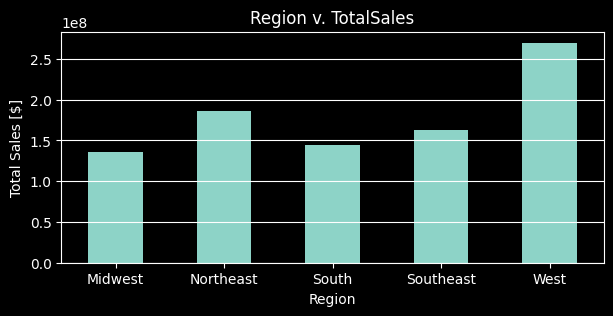

In [255]:
# visualizing Sales by Region
plt.figure(figsize = (7,3))
sales_by_region.plot(kind = 'bar')
plt.xticks(rotation = None)
plt.grid(axis = 'y', linestyle = '-', color = 'white')
plt.title('Region v. TotalSales')
plt.xlabel('Region')
plt.ylabel('Total Sales [$]')
plt.show()


West Region has the highest sales amount, and Midwest Region has the least sales amount.

## Sales by State

In [256]:
# Sales by State
sales_by_state = pd.DataFrame(df.groupby('State')['TotalSales'].sum()).sort_values(by = 'TotalSales', ascending = False)
sales_by_state


,TotalSales
State,
New York,64229039.0
California,60174133.0
Florida,59283714.0
Texas,46359746.0
South Carolina,29285637.0
Washington,26330718.0
North Carolina,23956531.0
Louisiana,23750781.0
Hawaii,22282457.0


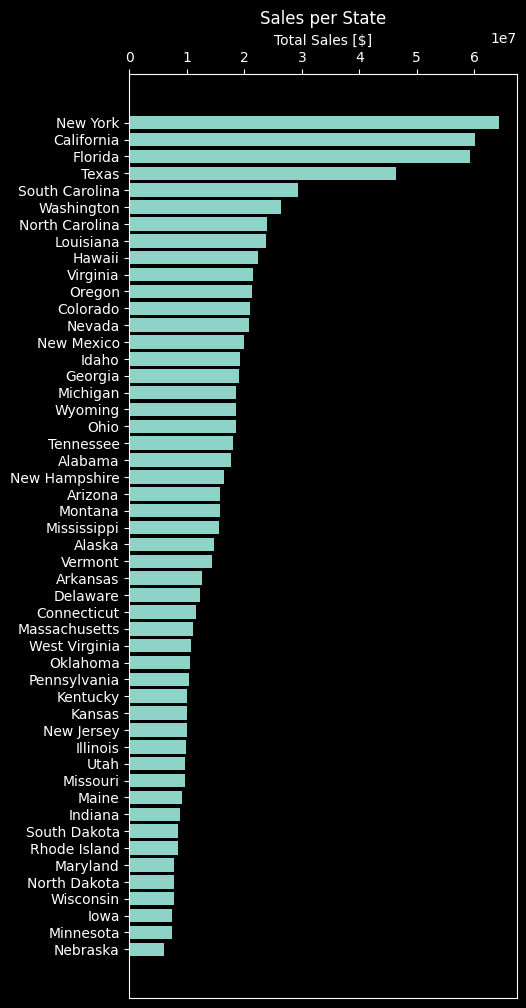

In [257]:
# visualizing Sales by State
plt.figure(figsize = (5,12))
plt.barh(sales_by_state.sort_values(by = 'TotalSales').index, sales_by_state.sort_values(by = 'TotalSales')['TotalSales'])
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.title('Sales per State')
plt.xlabel('Total Sales [$]')
plt.show()


## Sales by City

In [258]:
# Sales by City
sales_by_city = pd.DataFrame(df.groupby('City')['TotalSales'].sum()).sort_values(by = 'TotalSales', ascending = False)
sales_by_city


,TotalSales
City,
Charleston,39974797.0
New York,39801235.0
San Francisco,34539220.0
Miami,31600863.0
Portland,30545652.0
Orlando,27682851.0
Seattle,26330718.0
Los Angeles,25634913.0
Houston,25456882.0


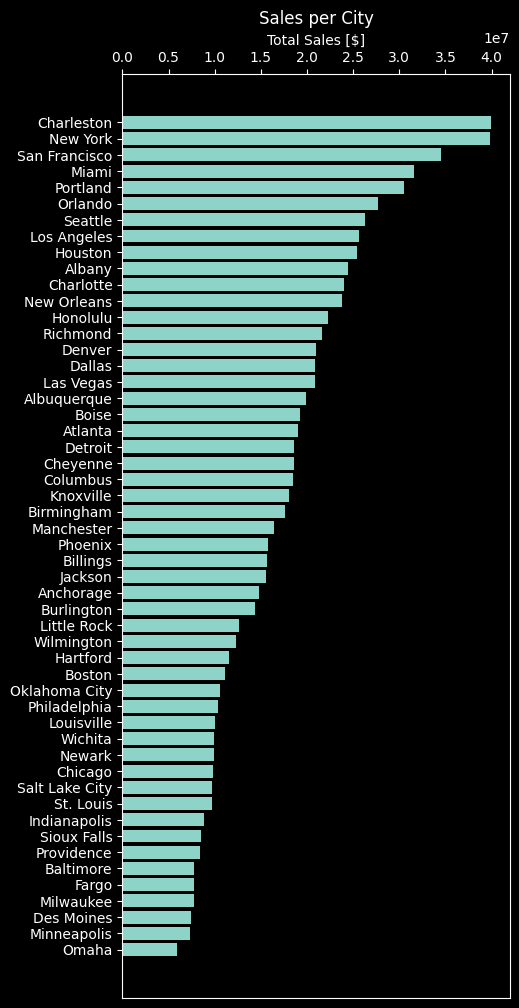

In [259]:
# visualizing Sales by City
plt.figure(figsize = (5,12))
plt.barh(sales_by_city.sort_values(by = 'TotalSales').index, sales_by_city.sort_values(by = 'TotalSales')['TotalSales'])
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.title('Sales per City')
plt.xlabel('Total Sales [$]')
plt.show()


## Sales by Retailer

In [260]:
# Sales by Retailer
sales_by_retailer = df.groupby('Retailer')['TotalSales'].sum()
sales_by_retailer


,TotalSales
Retailer,
Amazon,77698912.0
Foot Locker,220094720.0
Kohl's,102114753.0
Sports Direct,182470997.0
Walmart,74558410.0
West Gear,242964333.0


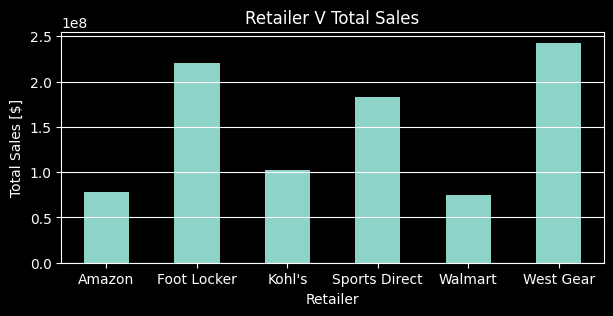

In [261]:
# visualizing Sales by Retailer
plt.figure(figsize = (7,3))
sales_by_retailer.plot(kind = 'bar')
plt.xticks(rotation = None)
plt.grid(axis = 'y', linestyle = '-', color = 'white')
plt.title('Retailer V Total Sales')
plt.xlabel('Retailer')
plt.ylabel('Total Sales [$]')
plt.show()


It's obvious from chart above, West Gear, Foot Locker, and Sports Direct are dominating the sales.

## Sales by Product

In [262]:
# Sales by Product
sales_by_product = df.groupby('Product')['TotalSales'].sum()
sales_by_product


,TotalSales
Product,
Men's Apparel,123728632.0
Men's Athletic Footwear,153673680.0
Men's Street Footwear,208826244.0
Women's Apparel,179038860.0
Women's Athletic Footwear,106631896.0
Women's Street Footwear,128002813.0


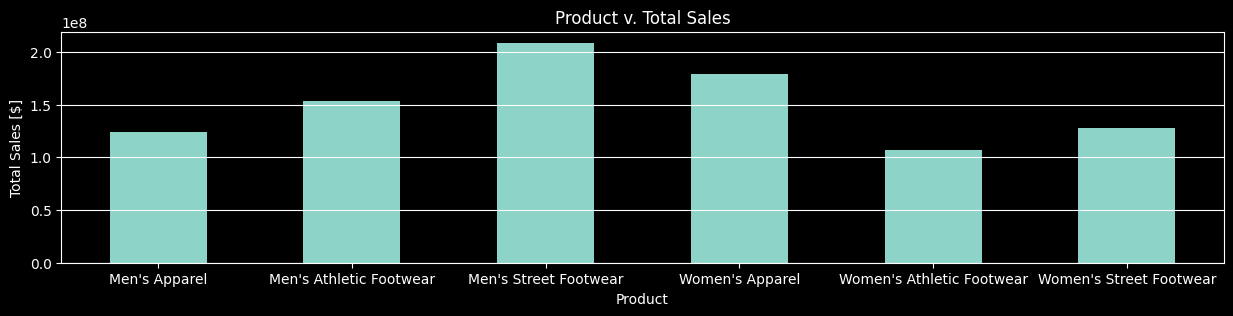

In [263]:
# visualizing Sales by Product
plt.figure(figsize = (15,3))
sales_by_product.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '-', color = 'white')
plt.title('Product v. Total Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales [$]')
plt.show()


Let's display the share percentage of each product type.

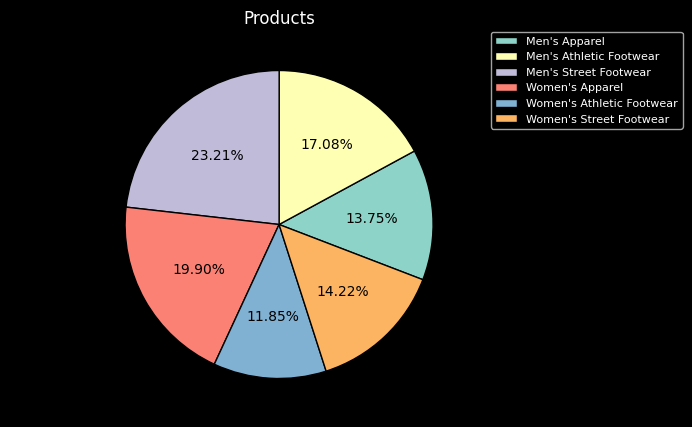

In [264]:
# visualize different products share in Sales
plt.figure(figsize = (10,5))
sales_by_product.plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    startangle = -21,
    wedgeprops = {'edgecolor': 'black'},
    textprops = {'color': 'black'}
    )
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0., prop = {'size': 8})
plt.title("Products")
plt.ylabel("")
plt.show()


## SalesMethod

Let's see which SalesMethod is the most favourite by customers.

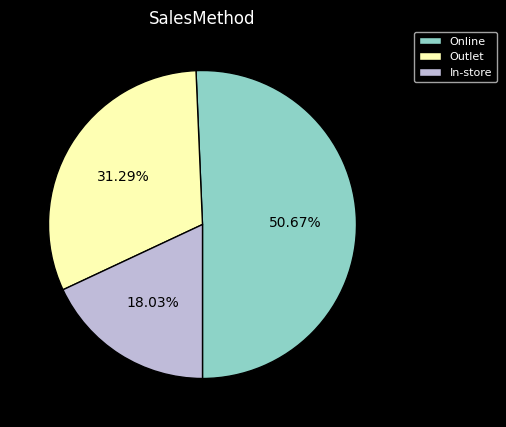

In [265]:
# SalesMethod
plt.figure(figsize = (5,5))
df['SalesMethod'].value_counts().plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    startangle = 270,
    wedgeprops = {'edgecolor': 'black'},
    textprops = {'color': 'black'}
)
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0., prop = {'size': 8})
plt.title("SalesMethod")
plt.ylabel("")
plt.show()


As shown, Online Sales are having the highest share of SalesMethods.

# Time Series Analysis

Let's visualize total sales and OperatingProfit over time.

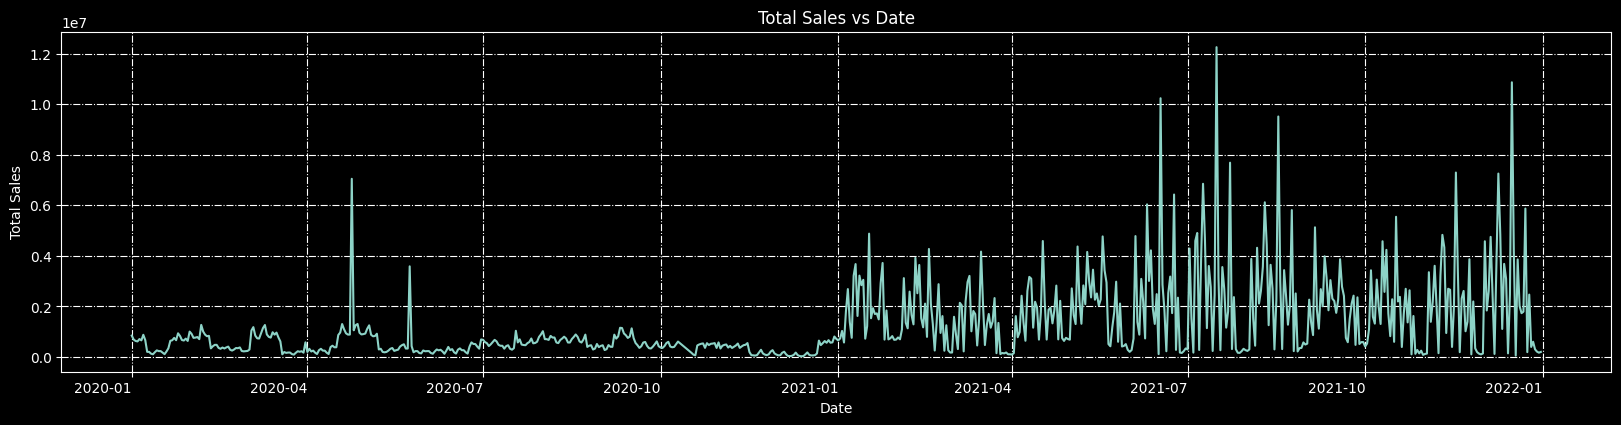

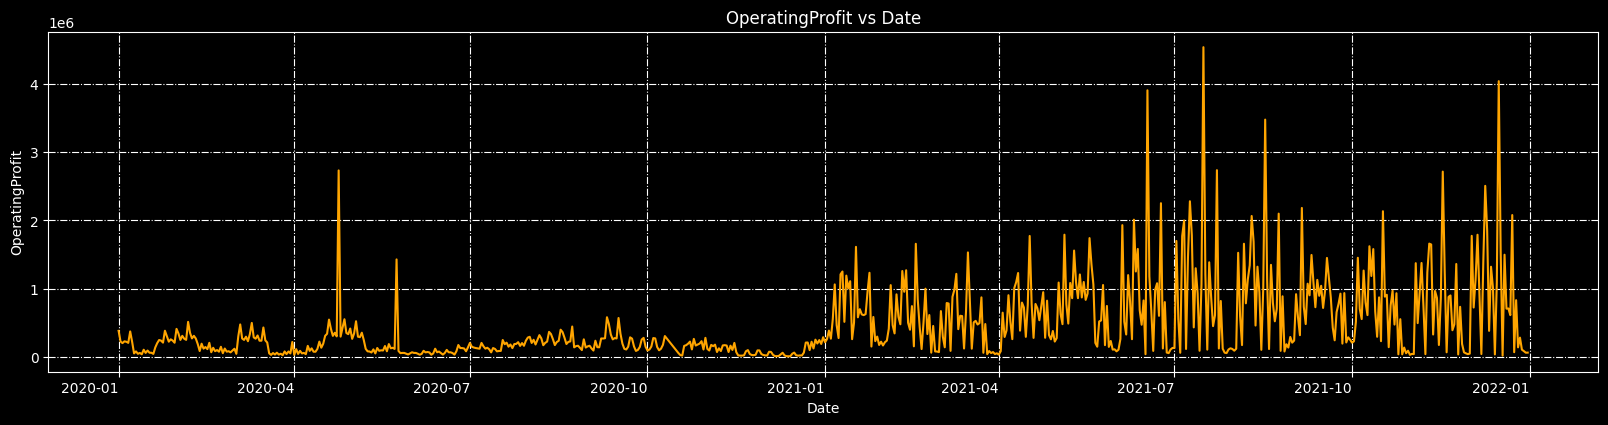

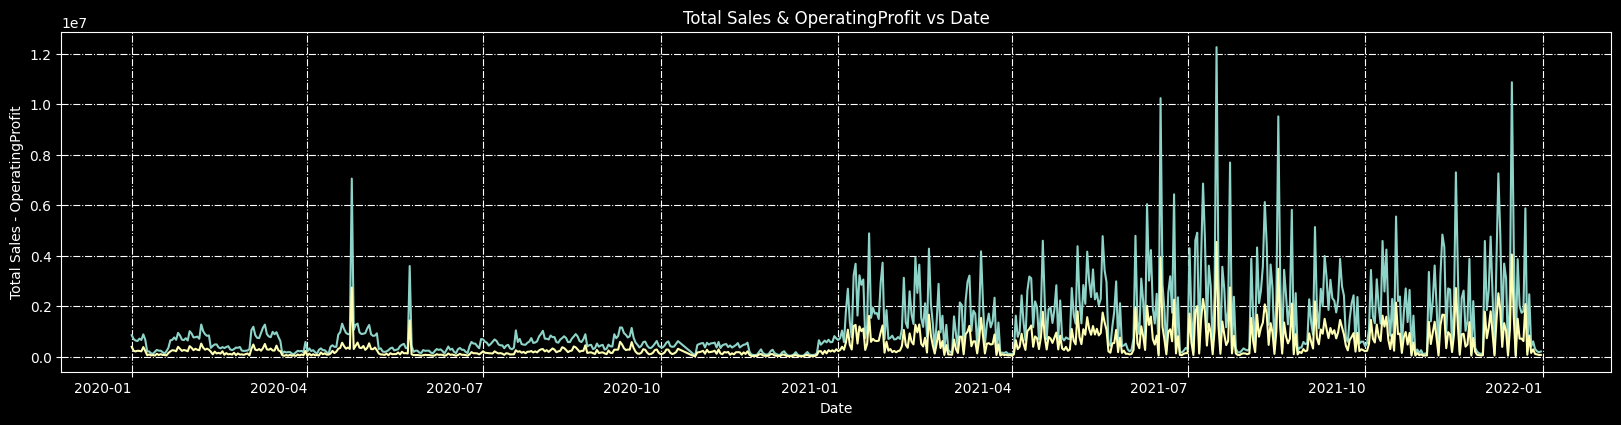

In [266]:
# TotalSales by Invoice Date
plt.figure(figsize = (20,5))
df.groupby('InvoiceDate')['TotalSales'].sum().plot(kind = 'line')
plt.title('Total Sales vs Date')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation = None)
plt.grid( linestyle = '-.', color = 'white')
plt.show()

# OperatingProfit by Invoice Date
plt.figure(figsize = (20,5))
df.groupby('InvoiceDate')['OperatingProfit'].sum().plot(kind = 'line', color = 'orange')
plt.title('OperatingProfit vs Date')
plt.xlabel('Date')
plt.ylabel('OperatingProfit')
plt.xticks(rotation = None)
plt.grid( linestyle = '-.', color = 'white')
plt.show()

# comparing TotalSales and OperatingProfit
plt.figure(figsize = (20,5))
df.groupby('InvoiceDate')['TotalSales'].sum().plot(kind = 'line')
df.groupby('InvoiceDate')['OperatingProfit'].sum().plot(kind = 'line')
plt.title('Total Sales & OperatingProfit vs Date')
plt.xlabel('Date')
plt.ylabel('Total Sales - OperatingProfit')
plt.xticks(rotation = None)
plt.grid( linestyle = '-.', color = 'white')
plt.show()


The sales amount was low in 2020. However, In 2021, the sales went high espically in the middle of 2021. (June - August).

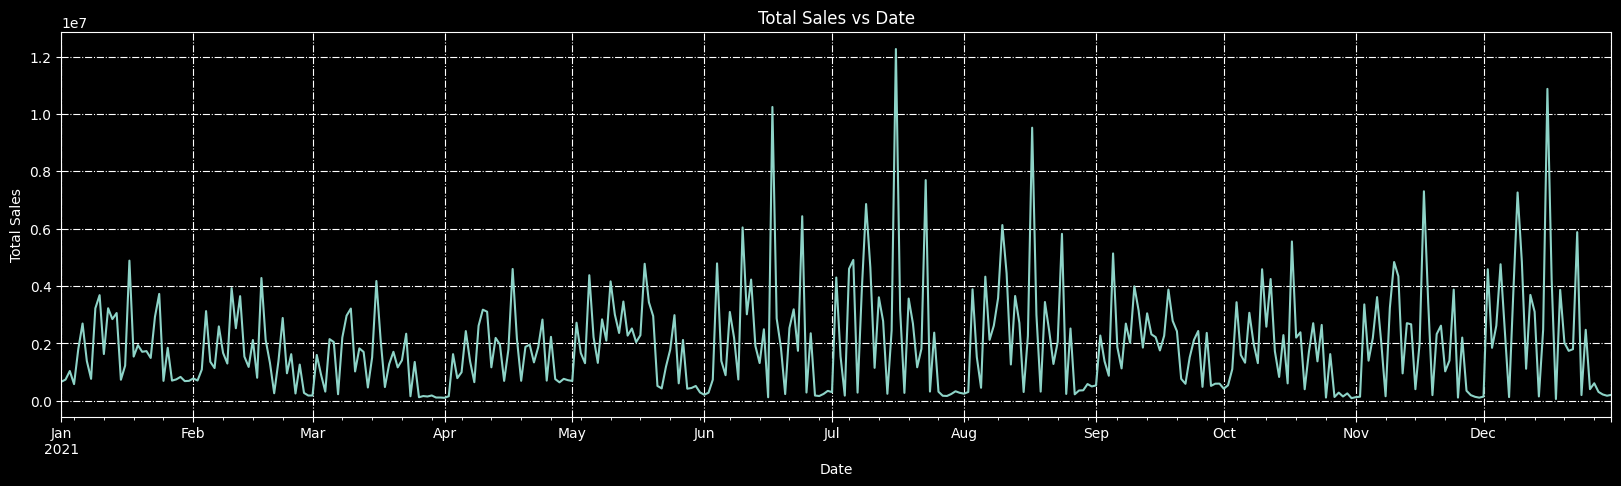

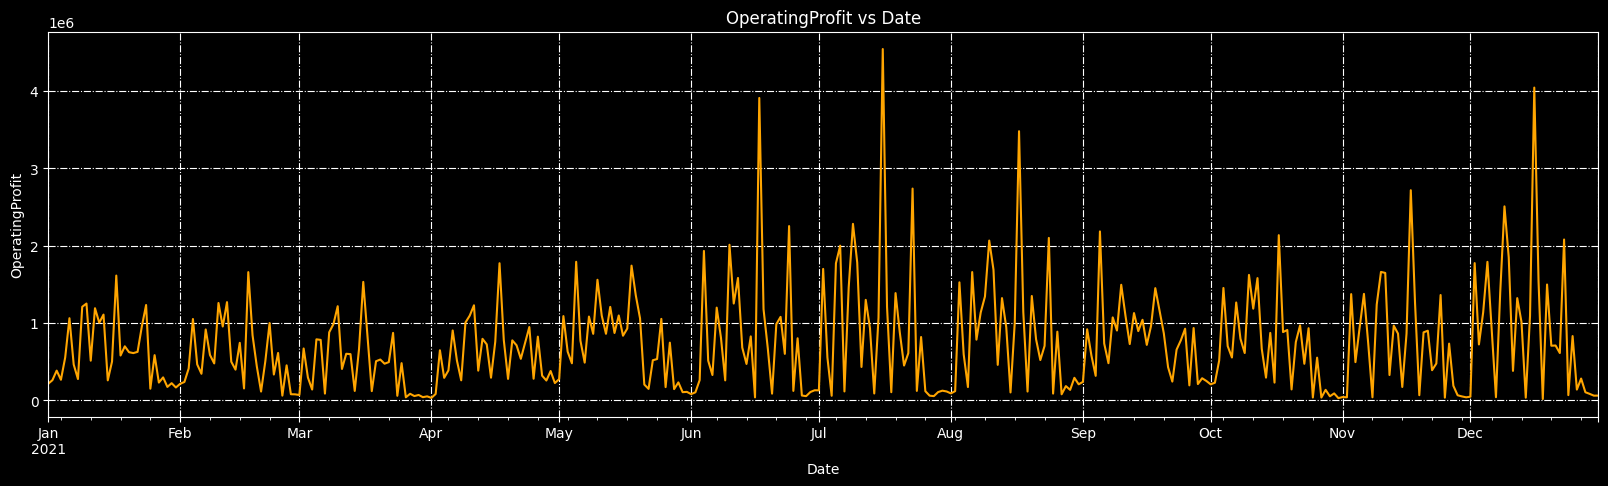

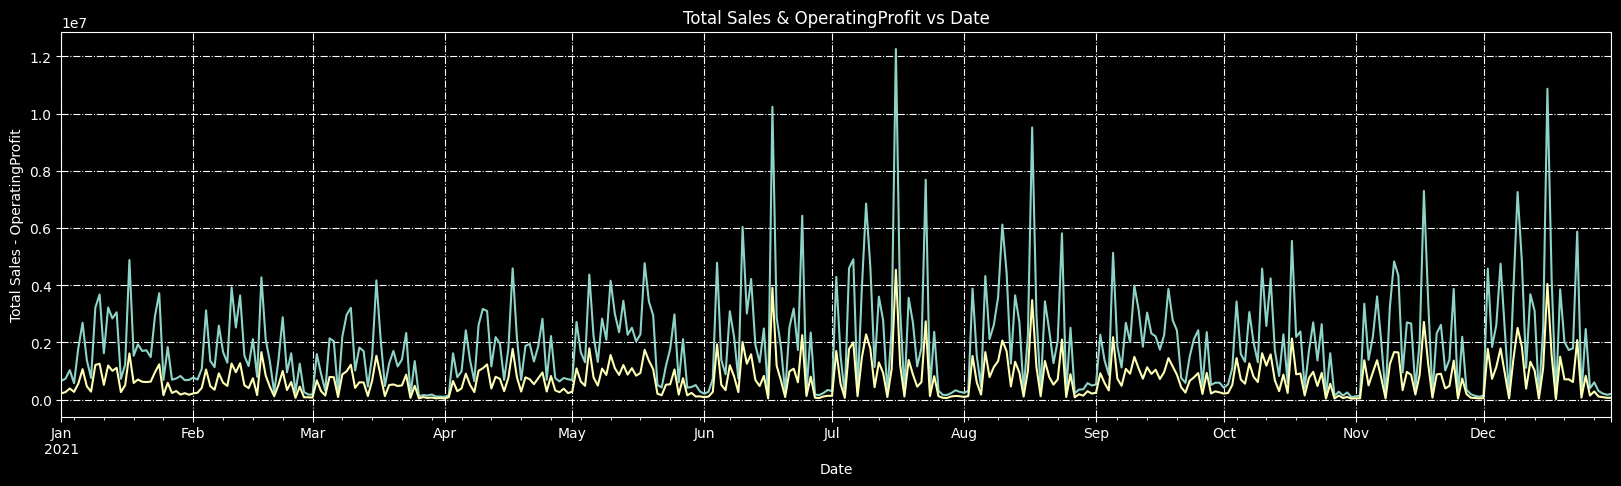

In [267]:
# focusing on year 2021

# TotalSales by Invoice Date
plt.figure(figsize = (20,5))
df[df['InvoiceDate'] >= '2021-01-01'].groupby('InvoiceDate')['TotalSales'].sum().plot(kind = 'line')
plt.title('Total Sales vs Date')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation = None)
plt.grid( linestyle = '-.', color = 'white')
plt.show()

# OperatingProfit by Invoice Date
plt.figure(figsize = (20,5))
df[df['InvoiceDate'] >= '2021-01-01'].groupby('InvoiceDate')['OperatingProfit'].sum().plot(kind = 'line', color = 'orange')
plt.title('OperatingProfit vs Date')
plt.xlabel('Date')
plt.ylabel('OperatingProfit')
plt.xticks(rotation = None)
plt.grid( linestyle = '-.', color = 'white')
plt.show()

# comparing TotalSales and OperatingProfit
plt.figure(figsize = (20,5))
df[df['InvoiceDate'] >= '2021-01-01'].groupby('InvoiceDate')['TotalSales'].sum().plot(kind = 'line')
df[df['InvoiceDate'] >= '2021-01-01'].groupby('InvoiceDate')['OperatingProfit'].sum().plot(kind = 'line')
plt.title('Total Sales & OperatingProfit vs Date')
plt.xlabel('Date')
plt.ylabel('Total Sales - OperatingProfit')
plt.xticks(rotation = None)
plt.grid( linestyle = '-.', color = 'white')
plt.show()


# Data Correlation

Let's apply correlation concept to numerical column data and see how they are affecting each other.

In [268]:
# extract numerical columns
categ_columns = ['InvoiceDate']

for col in df.columns:
    if df[col].dtype == 'object':
        categ_columns.append(str(col))

df_num = df.drop(columns = categ_columns)
df_num.head()


,RetailerID,UnitPrice,UnitsSold,TotalSales,OperatingProfit,OperatingMarginPercentage
0,1185732,50.0,1200,600000.0,300000.0,0.50
1,1185732,50.0,1000,500000.0,150000.0,0.30
2,1185732,40.0,1000,400000.0,140000.0,0.35
3,1185732,45.0,850,382500.0,133875.0,0.35
4,1185732,60.0,900,540000.0,162000.0,0.30


In [269]:
# defining correlation matrix
Corr_Mat = df_num.corr(method = 'pearson')
Corr_Mat


,RetailerID,UnitPrice,UnitsSold,TotalSales,OperatingProfit,OperatingMarginPercentage
RetailerID,1.000000,-0.391684,-0.003194,-0.083580,-0.027137,0.216780
UnitPrice,-0.391684,1.000000,0.265869,0.435811,0.394546,-0.137486
UnitsSold,-0.003194,0.265869,1.000000,0.913431,0.892379,-0.305479
TotalSales,-0.083580,0.435811,0.913431,1.000000,0.956307,-0.364592
OperatingProfit,-0.027137,0.394546,0.892379,0.956307,1.000000,-0.211921
OperatingMarginPercentage,0.216780,-0.137486,-0.305479,-0.364592,-0.211921,1.000000


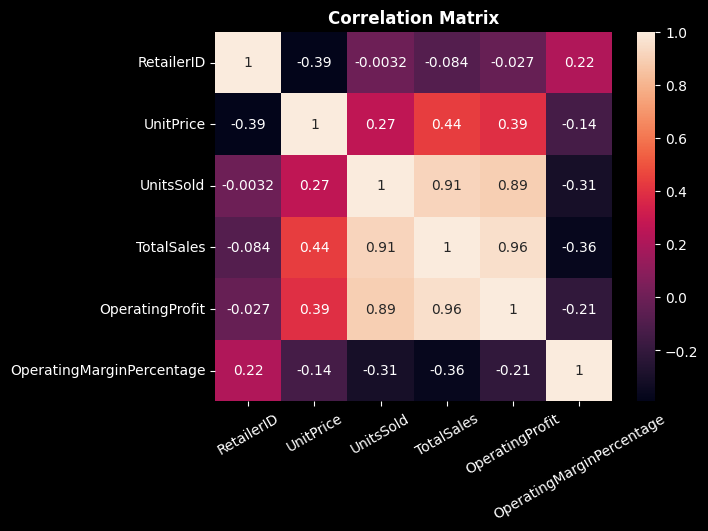

In [270]:
# present correlation matrix as heatmap
sns.heatmap(Corr_Mat, annot = True)
plt.title('Correlation Matrix', weight = 'bold')
plt.xticks(rotation = 30)
plt.yticks(rotation = 0)
plt.show()


Some meaningful numbers in this correlation matrix and see how the relation between columns are affected. <br>

- UnitPrice & UnitsSold $\longrightarrow$ 0.27
- UnitPrice & TotalSales $\longrightarrow$ 0.44
- UnitsSold & TotalSales $\longrightarrow$ 0.91
- TotalSales & OperatingProfit $\longrightarrow$ 0.96
- TotalSales & OperatingMarginPercentage $\longrightarrow$ - 0.36
- OperatingProfit & OperatingMarginPercentage $\longrightarrow$ - 0.21




---


**End of Project**